# 1.)IMPORT THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.)DOWNLOAD AND UPLOAD THE DATASET INTO THE TOOL

In [2]:
df = pd.read_csv('/Mall_Customers.csv')
df = df.drop(columns=["CustomerID"])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# 3.)CHECK FOR MISSING VALUES AND DEAL WITH THEM

In [3]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 4.)PERFORM DESCRIPTIVE STATISTICS ON THE DATASET

In [4]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


# 5.)PERFORM VISUALIZATIONS

# a.)UNIVARIANTE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


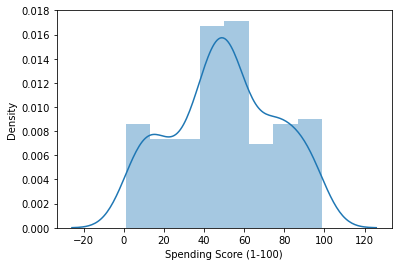

In [6]:
sns.distplot(df["Spending Score (1-100)"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


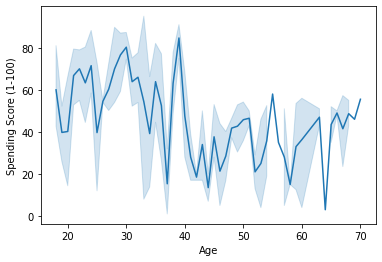

In [7]:
sns.lineplot(df['Age'],df["Spending Score (1-100)"])

# c.)MULTIVARIANTE ANALYSIS

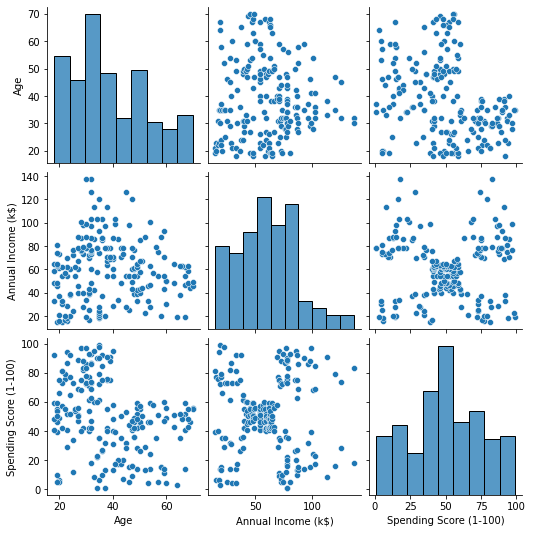

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


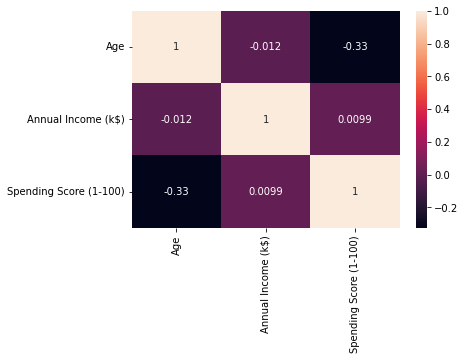

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# 6.)FIND THE OUTLIERS AND REPLACE THE OUTLIERS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


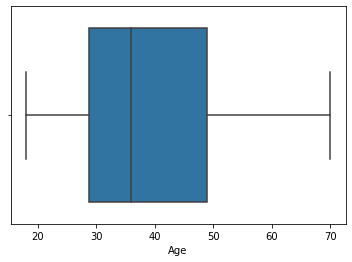

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


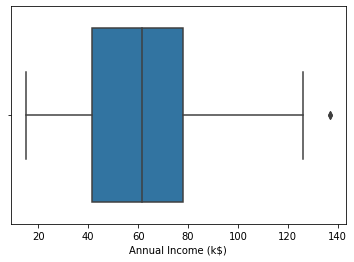

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


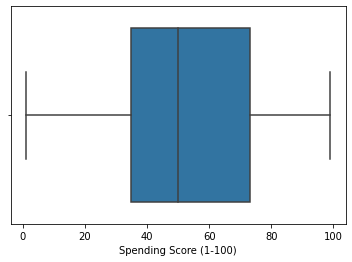

In [11]:
for i in df.columns.drop("Gender"):
    sns.boxplot(df[i])
    plt.show()

In [12]:
for i in df.columns.drop('Gender'):
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    df[i] = np.where(df[i]>=upper_limit,Q3 + (1.5*IQR),df[i])
    df[i] = np.where(df[i]<=lower_limit,Q1 - (1.5*IQR),df[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


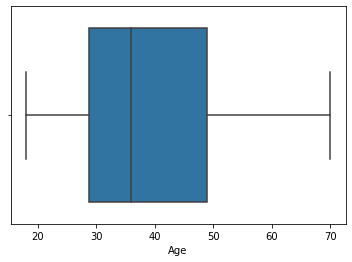

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


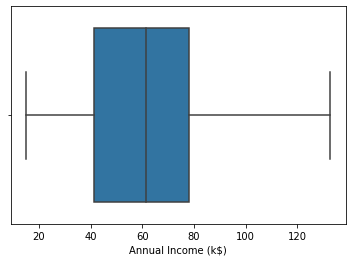

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


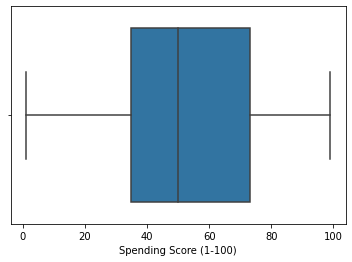

In [13]:
for i in  df.columns.drop('Gender'):
    sns.boxplot(df[i])
    plt.show()

# 7.)CHECK FOR CATEGORICAL COLUMNS AND PERFORM ENCODING

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

In [15]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


# 8.)SCALING THE DATA

In [16]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df = pd.DataFrame(scale.fit_transform(df),columns=df.columns)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.745429,-0.434801
1,1.128152,-1.281035,-1.745429,1.195704
2,-0.886405,-1.352802,-1.707083,-1.715913
3,-0.886405,-1.137502,-1.707083,1.040418
4,-0.886405,-0.563369,-1.668737,-0.395980


# 9.)PERFORM ANY OF THE CLUSTERING ALGORITHMS

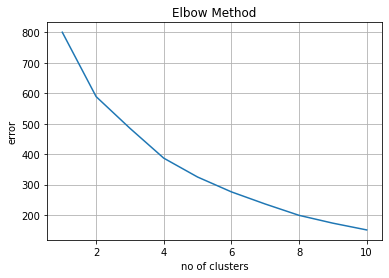

In [17]:
from sklearn.cluster import KMeans
error = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(df)
  error.append(kmeans.inertia_)
plt.plot(range(1,11),error)
plt.title('Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('error')
plt.grid()
plt.show()

In [18]:
km = KMeans(n_clusters=8)
Category = km.fit_predict(df)
Category

array([0, 0, 4, 4, 4, 4, 2, 4, 3, 4, 3, 4, 2, 4, 0, 0, 4, 0, 3, 4, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 4, 3, 4, 3, 0, 2, 4, 2, 4, 2, 4, 2, 0, 3, 4,
       2, 4, 2, 4, 4, 4, 2, 0, 4, 3, 2, 3, 2, 3, 4, 3, 3, 0, 2, 2, 3, 0,
       2, 2, 0, 4, 3, 2, 2, 2, 3, 0, 2, 0, 4, 2, 3, 0, 3, 2, 4, 3, 2, 4,
       4, 2, 2, 0, 3, 2, 4, 0, 2, 4, 3, 0, 4, 2, 3, 0, 3, 4, 2, 3, 3, 3,
       3, 4, 1, 0, 4, 4, 2, 2, 2, 2, 0, 1, 5, 6, 1, 5, 7, 6, 3, 6, 7, 6,
       1, 5, 7, 5, 1, 6, 7, 5, 1, 6, 1, 5, 7, 6, 7, 5, 1, 6, 7, 6, 1, 5,
       1, 5, 7, 5, 7, 5, 1, 5, 7, 5, 7, 5, 7, 5, 1, 6, 7, 6, 7, 6, 1, 5,
       7, 6, 7, 6, 1, 5, 7, 5, 1, 6, 1, 6, 1, 5, 1, 5, 7, 5, 1, 5, 1, 6,
       7, 6], dtype=int32)

# 10.)ADD THE CLUSTER DATA WITH THE PRIMARY DATASET

In [19]:
df["Category"] = pd.Series(Category)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Category
0,1.128152,-1.424569,-1.745429,-0.434801,0
1,1.128152,-1.281035,-1.745429,1.195704,0
2,-0.886405,-1.352802,-1.707083,-1.715913,4
3,-0.886405,-1.137502,-1.707083,1.040418,4
4,-0.886405,-0.563369,-1.668737,-0.395980,4


# 11.)SPLITTING THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [20]:
X = df.drop(columns=["Category"])
Y = df.Category

# 10.)SPLIT THE DATA INTO TRAINING AND TESTING DATA

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# 11.)BUILD THE MODEL

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# 12.)TRAIN THE MODEL

In [23]:
model.fit(x_train,y_train)

RandomForestClassifier()

# 13.)TEST THE MODEL

In [24]:
y_predict = model.predict(x_test)

In [25]:
pd.DataFrame({"Actual":y_test,"Predicted":y_predict.round(0)})

,Actual,Predicted
18,3,3
170,7,7
107,3,3
98,3,3
177,6,6
182,7,7
5,4,4
146,7,7
12,2,2
152,1,1


# 14.)MEASURE THE PERFORMANCE USING METRICS

In [26]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_predict)

0.975

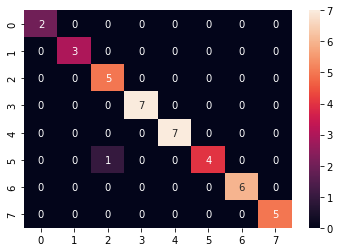

In [27]:
sns.heatmap(metrics.confusion_matrix(y_test,y_predict),annot=True)

In [28]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         5

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

